# Imports 

In [ ]:
import numpy as np
import cmath
import time 
from scipy.io.wavfile import write
from scipy import signal
import matplotlib.pyplot as plt 

# Section 1.1

In [ ]:
class inner_product_2D(): 
  # 2D inner product for two signals of length N
  def __init__(self, x, y):
    self.x = x
    self.y = y
    self.N = len(x)

  def solve(self): 
    # 2D inner product is x(n,m)y*(n,m)
    inner_product = 0
    for i in range (self.N):
      for j in range (self.N):
        inner_product = inner_product + self.x[i,j] * np.conj(self.y[i,j])
    
    return inner_product

# Section 1.2

In [ ]:
class comp_exp_2D(): 
  # 2D comp exp is exp(j2pi(kn/N + lm/M))
  def __init__(self, k, l, N): 
    self.k = k
    self.l = l
    self.N = N

  def solve(self): 
    comp_exp_kl = np.zeros([self.N, self.N], dtype = np.complex)
    for i in range(self.N): 
      for j in range(self.N):
        comp_exp_kl[i,j] = np.exp(-1j*2*cmath.pi*self.k*i/self.N) * np.exp(-1j*2*cmath.pi*self.l*m*self.N)
  
    comp_exp_real = np.real(comp_exp_kl)
    comp_exp_imag = np.imag(comp_exp_kl)
    return comp_exp_kl, comp_exp_real, comp_exp_imag

# Section 1.3 

In [ ]:
class square_pulse_2D(): 
  def __init__(self, N, L):
    self.N = N
    self.L = L
    self.samples = N*N

  def solve(self):
    square_pulse = np.zeros([self.N, self.N], dtype = np.float)
    for i in range (self.L):
      for j in range (self.L):
        square_pulse[i][j] = 1 / (self.L * self.L)
    
    return square_pulse, self.samples 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


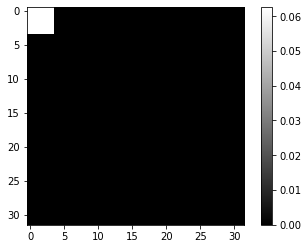

In [ ]:
if __name__ == '__main__':
  duration_of_signal = 32
  L_value = 4
  square_2D = square_pulse_2D(duration_of_signal, L_value)
  square_pulse, samples = square_2D.solve()
  
  plt.imshow(square_pulse, cmap='gray')
  plt.colorbar()
  plt.show()

# Section 1.4 

In [ ]:
class Gaussian_2D():
  def __init__ (self, N, mu, sigma):
    self.N = N
    self.sigma = sigma 
    self.mu = mu
    self.samples = N*N

  def solve(self):
    gaussian = np.zeros([self.N, self.N], dtype=np.float)    #Gaussian pulse exclusively real 
    for i in range(self.N):
      for j in range(self.N):
        gaussian[i][j] = np.exp(-1*((i-self.mu)**2 + (j-self.mu)**2)/(2*(self.sigma)**2))
    
    return gaussian, self.samples 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


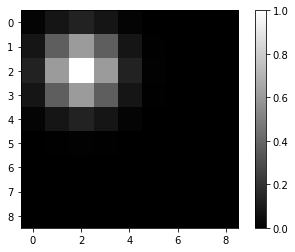

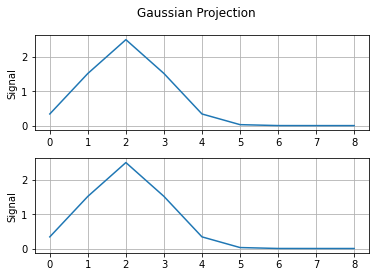

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


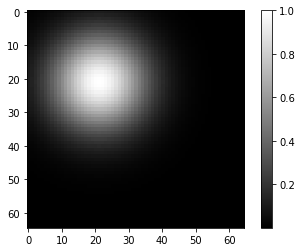

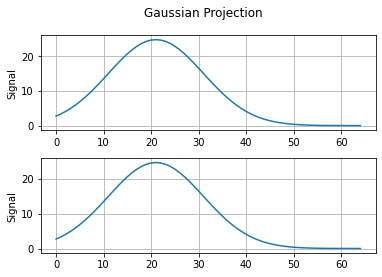

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


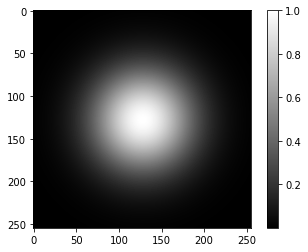

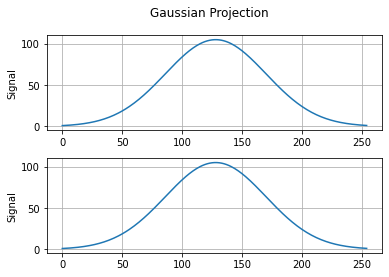

In [ ]:
if __name__ == '__main__':
  Nvalues = [9, 65, 255]
  mus = [2, 21, 128]
  sigmas = [1, 10, 42]

  for i in range(0, len(Nvalues)):
    gaussian_obj = Gaussian_2D(Nvalues[i], mus[i], sigmas[i])
    gaussian, samples = gaussian_obj.solve()

    plt.imshow(gaussian, cmap='gray')
    plt.colorbar()

    # Plot
    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Gaussian Projection')
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    axs[0].plot(np.sum(gaussian, axis=0))
    axs[0].set_ylabel('Signal')
    axs[1].plot(np.sum(gaussian, axis=1))
    axs[1].set_ylabel('Signal')
    plt.show()

# Section 1.5 

In [ ]:
class DFT_2D():
  def __init__(self, x):
    self.x = x
    self.M = np.shape(x)[0]
    self.N = np.shape(x)[1]
  
  def solve(self):
    DFT = np.zeros([self.M, self.N], dtype=np.complex)
    for m in range(self.M):
      for n in range(self.N):
        for i in range(self.M):
          for j in range(self.N):
            DFT[m][n] = DFT[m][n] + self.x[i][j]/np.sqrt(self.M*self.N) * np.exp(-1j*2*cmath.pi*(m*i/self.M + n*j/self.N))
    return DFT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


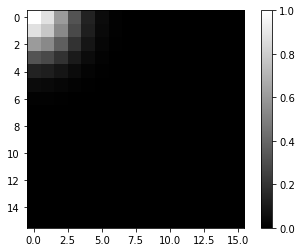

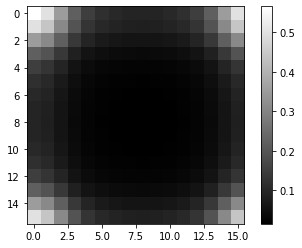

In [ ]:
if __name__ == '__main__':
  gaussian_obj = Gaussian_2D(16, 0, 2) 
  gaussian, samples = gaussian_obj.solve() 
  
  gaussian_DFT= DFT_2D(gaussian)
  DFT = gaussian_DFT.solve()

  plt.imshow(abs(DFT), cmap='gray')
  plt.colorbar()
  plt.show()

# Section 1.6 

In [ ]:
class iDFT_2D():
  def __init__(self, X):
    self.X = X
    self.M = np.shape(X)[0]
    self.N = np.shape(X)[1]
  
  def solve(self):
    iDFT = np.zeros([self.M, self.N], dtype=np.complex)
    for m in range(self.M):
      for n in range(self.N):
        for i in range(int(self.M/2)+1):
          for j in range(self.N):
            iDFT[m][n] = iDFT[m][n] + self.X[i][j]/np.sqrt(self.M*self.N) * np.exp(1j*2*cmath.pi*(m*i/self.M + n*j/self.N))
            if i != 0:
              iDFT[m][n] = iDFT[m][n] + np.conj(self.X[i][j])/np.sqrt(self.M*self.N) * np.exp(1j*2*cmath.pi*(-m*i/self.M - n*j/self.N))
    return iDFT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


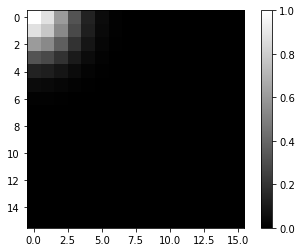

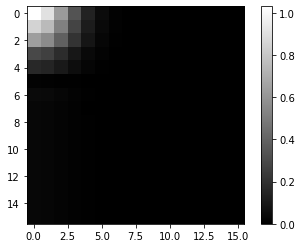

In [ ]:
if __name__ == '__main__':
  gaussian_obj = Gaussian_2D(16, 0, 2) 
  gaussian, samples = gaussian_obj.solve() 
  
  gaussian_DFT= DFT_2D(gaussian)
  DFT = gaussian_DFT.solve()
  
  gaussian_iDFT = iDFT_2D(DFT)
  iDFT = gaussian_iDFT.solve()
  
  plt.imshow(abs(gaussian), cmap='gray')
  plt.colorbar()
  plt.show()

  plt.imshow(abs(iDFT), cmap='gray')
  plt.colorbar()
  plt.show()

# Section 2 

In [ ]:
from scipy import signal
import matplotlib.image as mpimg

class Convolution_2D():
  def __init__(self, signal, filter):
    self.signal = signal
    self.filter = filter

  def solve(self):
    filtered = signal.convolve2d(self.signal, self.filter, boundary = 'symm', mode = 'same')
    return filtered

def q_21(N, img):
  mu = (N - 1) / 2
  sigma = (N - 1) / 6

  original_signal = Gaussian_2D(N, mu, sigma)
  gaussian_signal, samples = original_signal.solve()

  gaussian_signal_convolution = Convolution_2D(img, gaussian_signal)
  filtered = gaussian_signal_convolution.solve()

  plt.imshow(filtered, cmap='gray')
  plt.title('Filter with N = ' + str(N))
  plt.colorbar()
  plt.show()


if __name__ == '__main__':
  img = mpimg.imread('imgA.png')
  q_21(7, img)
  q_21(13, img)
  q_21(25, img)
  img1 = mpimg.imread('imgB.png')
  q_21(7, img1)
  q_21(13, img1)
  q_21(25, img1)